Abstract Clustering

In [ ]:
import json
import pandas as pd
 
label2id = {
    'NONE': 0,
    'EVIDENCE': 1,
    'CLAIM': 2}
 
def load_corpus(path, label_mapping=None):
    with open(path) as fp:
        corpus = json.load(fp)
 
    documents, texts, labels, eu_call, project_objective = [], [], [], [], []
    for abstract in corpus:
        documents.append(abstract)
        texts.append(corpus[abstract]['sentences'])
        eu_call.append(corpus[abstract]['eu_call'])
        project_objective.append(corpus[abstract]['project_objective'])
        if isinstance(label_mapping, dict):
            labels.append(
                [label_mapping[str(l).upper()]
                    for l in corpus[abstract]['labels']])
        else:
            labels.append([str(l).upper() for l in corpus[abstract]['labels']])
 
    assert len(texts) == len(labels)
    data = pd.DataFrame(
        zip(documents, texts, labels,eu_call,project_objective),
        columns=['document', 'sentences', 'labels','eu_call','project_objective'])
 
    return data
 
data = load_corpus('dataset_aueb_argument_v2.json') #, label_mapping=label2id)
print(f'Dataset length: {len(data)} abstracts')
data.sample(5)

Dataset length: 916 abstracts


,document,sentences,labels,eu_call,project_objective
893,doi: 10.5194/gmd-11-2857-2018,[Vegetation distribution and terrestrial carbo...,"[NEITHER, NEITHER, NEITHER, NEITHER, NEITHER, ...",H2020-EU.1.1.,The Land Biosphere is a critical component of ...
175,doi: 10.1016/j.erss.2020.101780,[The desirability of transitions in demand: In...,"[NEITHER, EVIDENCE, EVIDENCE, NEITHER, EVIDENC...",H2020-EU.3.5.1.,PARIS REINFORCE aims to underpin climate polic...
263,doi: 10.1021/acs.analchem.8b01361,[Multimodal Chemical Imaging of Amyloid Plaque...,"[NEITHER, NEITHER, NEITHER, NEITHER, NEITHER, ...",H2020-EU.1.1.,Critical to our understanding of Alzheimer’s d...
486,doi: 10.1051/0004-6361/201935779,[Using Herschel and Planck observations to del...,"[NEITHER, NEITHER, EVIDENCE, EVIDENCE, EVIDENC...",H2020-EU.1.1.,Star Formation is a hierarchical process from ...
801,doi: 10.3389/fnins.2018.00789,[Optogenetic Light Sensors in Human Retinal Or...,"[NEITHER, NEITHER, NEITHER, NEITHER, NEITHER, ...",H2020-EU.1.1.,Gene therapy using adeno-associated viral (AAV...


In [ ]:
abstract=data['sentences']

In [ ]:
eucall=data['eu_call']

In [ ]:
projectobj=data['project_objective']

Creation of embeddings:

● Document embeddings for the
  
  ○ Abstract;
  
  ○ Project objective (each abstract belongs to a project);
  
  ○ EU Call (each project belongs to an EU call).

In [ ]:
!pip install matplotlib-venn

In [ ]:
!apt-get -qq install -y libfluidsynth1

Selecting previously unselected package libfluidsynth1:amd64.
(Reading database ... 148492 files and directories currently installed.)
Preparing to unpack .../libfluidsynth1_1.1.9-1_amd64.deb ...
Unpacking libfluidsynth1:amd64 (1.1.9-1) ...
Setting up libfluidsynth1:amd64 (1.1.9-1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.2) ...
/sbin/ldconfig.real: /usr/local/lib/python3.7/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link



In [ ]:
#https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 148497 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.2.2-3.1ubuntu0.7_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.2.2-3.1ubuntu0.7) ...
Setting up libarchive-dev:amd64 (3.2.2-3.1ubuntu0.7) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
     |████████████████████████████████| 154 kB 7.7 MB/s 
  Created wheel for libarchive: filename=libarchive-0.4.7-py3-none-any.whl size=31647 sha256=3d8bd8b34e6333399e78a7ebe3cd4a1d4f22bd396073b34cfe8b0fa3343f2db8
  Stored in directory: /root/.cache/pip/wheels/63/b1/c6/b3da79bec2012175bd43603eed98ef8548ac1733b77c1d4330
Successfully built libarchive


In [ ]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

In [ ]:
!pip install cartopy
import cartopy

     |████████████████████████████████| 12.1 MB 147 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 219 kB 48.4 MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-linux_x86_64.whl size=12516256 sha256=a44de61fee96d326b5ed8b965e2ff008d0d94cc60243eb242b8bfed400142f6a
  Stored in directory: /root/.cache/pip/wheels/98/01/f7/bd10aeb96fe4b518cde5f7c4f5e12c7202f85b7353a5017847
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37325 sha256=bd30c0ff9bed124ad2efdfef10a8518da10c80357df06e6cbe53523ae2376d60
  Stored in directory: /root/.cache/pip/wheels/43/f8/87/53c8cd41545ba20e536ea29a8fcb5431b5f477ca50d5dffbbe
Successfully built cartopy pyshp


In [ ]:
pip install -U sentence-transformers

     |████████████████████████████████| 85 kB 2.5 MB/s 
     |████████████████████████████████| 2.8 MB 19.5 MB/s 
     |████████████████████████████████| 1.2 MB 51.5 MB/s 
     |████████████████████████████████| 50 kB 6.3 MB/s 
     |████████████████████████████████| 3.3 MB 41.1 MB/s 
     |████████████████████████████████| 636 kB 57.1 MB/s 
     |████████████████████████████████| 895 kB 73.5 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.0.0-py3-none-any.whl size=126710 sha256=12402f34d1a9258b2bb376453c740b5486329b15246540505b97db47b29523f3
  Stored in directory: /root/.cache/pip/wheels/d1/c1/0f/faafd427f705c4b012274ba60d9a91d75830306811e1355293
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.69k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/314 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
abstractlist=abstract.values.tolist()

In [ ]:
eucalllist=eucall.values.tolist()

In [ ]:
projectobjlist=projectobj.values.tolist()

In [ ]:
#Sentences are encoded by calling model.encode()
embeddingsab = model.encode(abstractlist)
embeddingsab.shape


(916, 384)

In [ ]:
#Sentences are encoded by calling model.encode()
embeddingseu = model.encode(eucalllist)
embeddingseu.shape


(916, 384)

In [ ]:
#Sentences are encoded by calling model.encode()
embeddingspj = model.encode(projectobjlist)
embeddingspj.shape


(916, 384)

● Sentence embeddings for the argument.

○ Claim only;

○ Claim and Evidence.

In [ ]:
#data.head(5)

,document,sentences,labels,eu_call,project_objective
0,doi: 10.1001/jamaneurol.2017.2814,[Concordance Between Different Amyloid Immunoa...,"[NEITHER, NEITHER, NEITHER, NEITHER, NEITHER, ...",H2020-EU.1.1.,Critical to our understanding of Alzheimer’s d...
1,doi: 10.1001/jamaneurol.2017.4913,[Association of Changes in Plasma Neurofilamen...,"[NEITHER, NEITHER, NEITHER, NEITHER, NEITHER, ...",H2020-EU.1.1.,Critical to our understanding of Alzheimer’s d...
2,doi: 10.1002/2015gl067056,[Dynamically triggered slip leading to sustain...,"[NEITHER, NEITHER, NEITHER, EVIDENCE, EVIDENCE...",H2020-EU.1.3.2.,Fluid overpressure has been proposed as one of...
3,doi: 10.1002/2015ms000564,[Impacts of parameterized orographic drag on t...,"[NEITHER, NEITHER, NEITHER, NEITHER, NEITHER, ...",H2020-EU.1.3.2.,Circulation changes are at the heart of change...
4,doi: 10.1002/2016gl069551,"[Climate model biases in jet streams, blocking...","[NEITHER, NEITHER, NEITHER, NEITHER, NEITHER, ...",H2020-EU.1.3.2.,Circulation changes are at the heart of change...


In [ ]:
labelstructure = data['labels'].explode().reset_index().rename(
    columns={'index': 'doc_id', 'lables': 'label'})
labelstructure

,doc_id,labels
0,0,NEITHER
1,0,NEITHER
2,0,NEITHER
3,0,NEITHER
4,0,NEITHER
...,...,...
9380,915,NEITHER
9381,915,NEITHER
9382,915,NEITHER
9383,915,NEITHER


In [ ]:
claim=labelstructure.loc[labelstructure['labels'] == 'CLAIM']

In [ ]:
evidence=labelstructure.loc[labelstructure['labels']== 'EVIDENCE'] 

In [ ]:
 claim_evidence=claim.append(evidence)

In [ ]:
claimlist=claim['labels']
claimlist=claimlist.values.tolist()

In [ ]:
claim_evidencelist=claim_evidence['labels']
claim_evidencelist=claim_evidencelist.values.tolist()

In [ ]:
#Sentences are encoded by calling model.encode()
embeddingsclaim= model.encode(claimlist)
embeddingsclaim.shape


(954, 384)

In [ ]:
#Sentences are encoded by calling model.encode()
embeddingsclaim_ev= model.encode(claim_evidencelist)
embeddingsclaim_ev.shape


(2532, 384)

## Elbow Method

The KElbowVisualizer implements the “elbow” method to help data scientists select the optimal number of clusters by fitting the model with a range of values for K. If the line chart resembles an arm, then the “elbow” (the point of inflection on the curve) is a good indication that the underlying model fits best at that point. In the visualizer “elbow” will be annotated with a dashed line.

To demonstrate, in the following example the KElbowVisualizer fits the KMeans model for a range of K values from 4 to 11 on a sample two-dimensional dataset with 8 random clusters of points. When the model is fit with 8 clusters, we can see a line annotating the “elbow” in the graph, which in this case we know to be the optimal number

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1a6c303650>,
                 k=None, metric=None, model=None, timings=True)

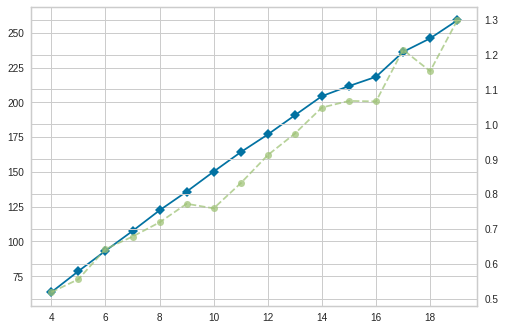

In [ ]:
# Generate synthetic dataset with 8 random clusters
#X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,20))

visualizer.fit(embeddingsab)        # Fit the data to the visualizer
#visualizer.show()        # Finalize and render the figure

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1a60243f50>,
                 k=None, metric=None, model=None, timings=True)

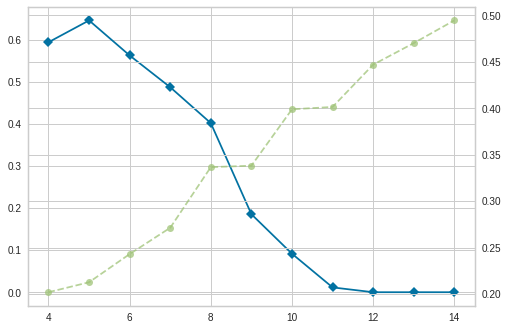

In [ ]:
# Generate synthetic dataset with 8 random clusters
#X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,15))

visualizer.fit(embeddingseu)        # Fit the data to the visualizer
#visualizer.show()        # Finalize and render the figure

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1a6017b690>,
                 k=None, metric=None, model=None, timings=True)

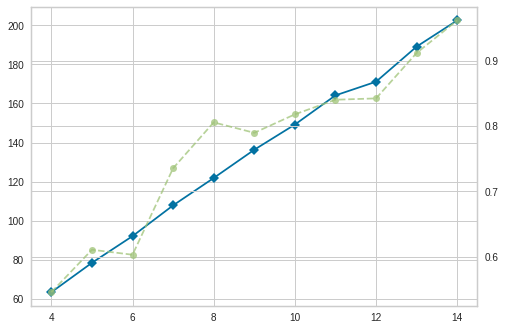

In [ ]:
# # Generate synthetic dataset with 8 random clusters
# #X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,15))

visualizer.fit(embeddingsab,embeddingseu)        # Fit the data to the visualizer
# #visualizer.show()        # Finalize and render the figure

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1a5ff3d110>,
                 k=None, metric=None, model=None, timings=True)

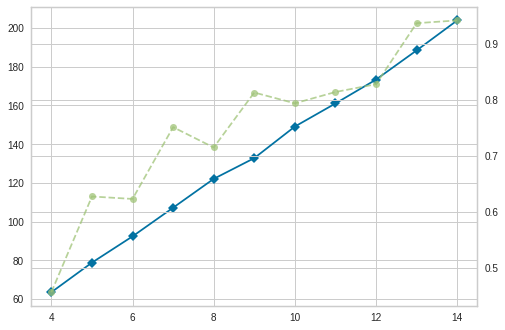

In [ ]:
# # Generate synthetic dataset with 8 random clusters
# #X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,15))

visualizer.fit(embeddingsab,embeddingspj)        # Fit the data to the visualizer
# #visualizer.show()        # Finalize and render the figure

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1a5fedaa90>,
                 k=None, metric=None, model=None, timings=True)

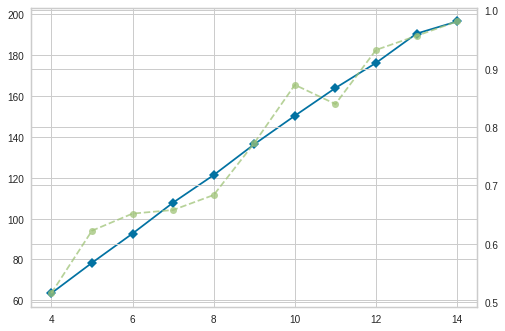

In [ ]:
# # Generate synthetic dataset with 8 random clusters
# #X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,15))

visualizer.fit(embeddingsab,embeddingsclaim)        # Fit the data to the visualizer
# #visualizer.show()        # Finalize and render the figure

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1a5fd9e4d0>,
                 k=None, metric=None, model=None, timings=True)

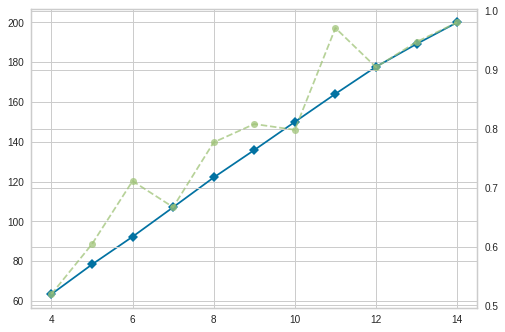

In [ ]:
# # Generate synthetic dataset with 8 random clusters
# #X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,15))

visualizer.fit(embeddingsab,embeddingsclaim_ev)        # Fit the data to the visualizer
# #visualizer.show()        # Finalize and render the figure

In [ ]:
import numpy as np
# concatenate 3 numpy arrays: row-wise
mergedemb_ab_eu_pj=np.concatenate((embeddingsab, embeddingseu, embeddingspj))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1a5fce67d0>,
                 k=None, metric=None, model=None, timings=True)

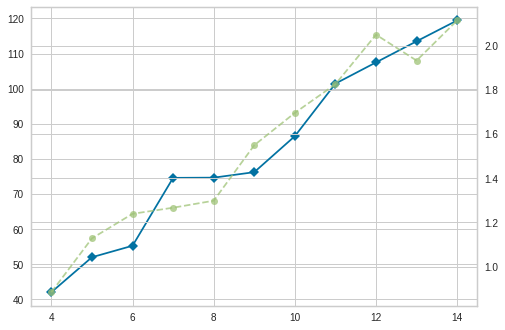

In [ ]:
# # Generate synthetic dataset with 8 random clusters
# #X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,15))

visualizer.fit(mergedemb_ab_eu_pj)        # Fit the data to the visualizer
# #visualizer.show()        # Finalize and render the figure

In [ ]:
import numpy as np
# concatenate 3 numpy arrays: row-wise
mergedemb_ab_cl_pj=np.concatenate((embeddingsab, embeddingsclaim, embeddingspj))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1a5fc28190>,
                 k=None, metric=None, model=None, timings=True)

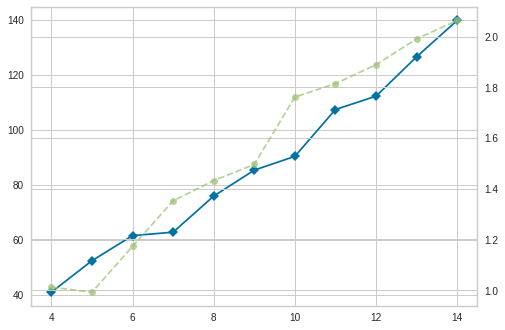

In [ ]:
# # Generate synthetic dataset with 8 random clusters
# #X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,15))

visualizer.fit(mergedemb_ab_cl_pj)        # Fit the data to the visualizer
# #visualizer.show()        # Finalize and render the figure

In [ ]:
import numpy as np
# concatenate 3 numpy arrays: row-wise
mergedemb_ab_clev_pj=np.concatenate((embeddingsab, embeddingsclaim_ev, embeddingspj))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1a5fb78350>,
                 k=None, metric=None, model=None, timings=True)

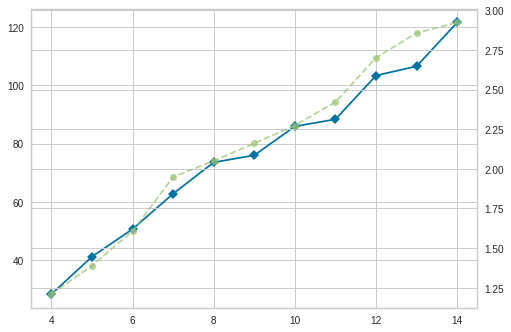

In [ ]:
# # Generate synthetic dataset with 8 random clusters
# #X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,15))

visualizer.fit(mergedemb_ab_clev_pj)        # Fit the data to the visualizer
# #visualizer.show()        # Finalize and render the figure

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1a5faa2610>,
                 k=None, metric=None, model=None, timings=True)

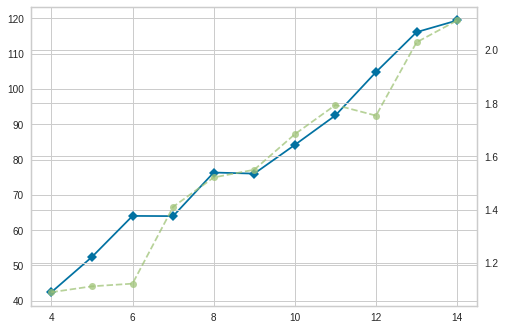

In [ ]:
# # Generate synthetic dataset with 8 random clusters
# #X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,15))

visualizer.fit(mergedemb_ab_eu_pj,embeddingsclaim)        # Fit the data to the visualizer
# #visualizer.show()        # Finalize and render the figure

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1a5f9f7610>,
                 k=None, metric=None, model=None, timings=True)

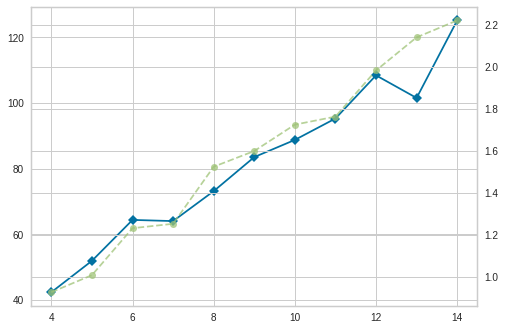

In [ ]:
# # Generate synthetic dataset with 8 random clusters
# #X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,15))

visualizer.fit(mergedemb_ab_eu_pj,embeddingsclaim_ev)        # Fit the data to the visualizer
#visualizer.show()                                      # Finalize and render the figure

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [ ]:
#print(__doc__)

Automatically created module for IPython interactive environment


For n_clusters = 2 The average silhouette_score is : 0.093387805
For n_clusters = 3 The average silhouette_score is : 0.06799054
For n_clusters = 4 The average silhouette_score is : 0.073974594
For n_clusters = 5 The average silhouette_score is : 0.06653583
For n_clusters = 6 The average silhouette_score is : 0.06890543
For n_clusters = 7 The average silhouette_score is : 0.07090879
For n_clusters = 8 The average silhouette_score is : 0.06357266
For n_clusters = 9 The average silhouette_score is : 0.06506361
For n_clusters = 10 The average silhouette_score is : 0.060716987


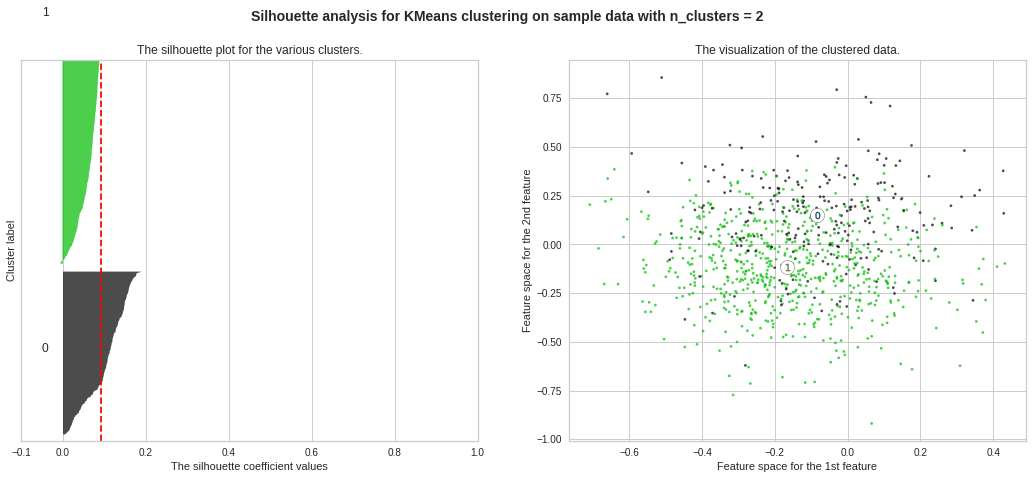

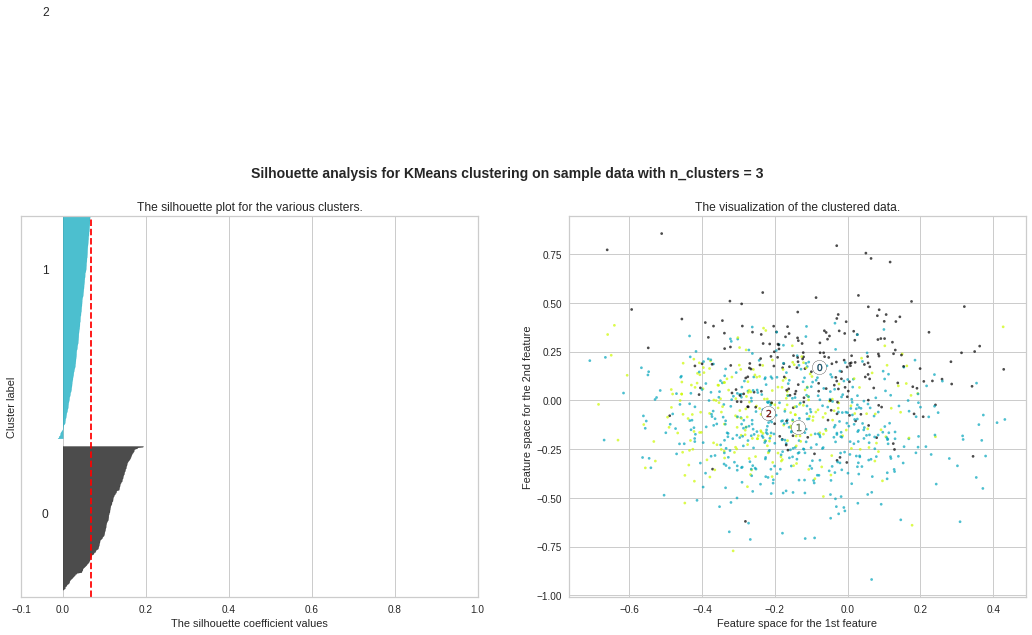

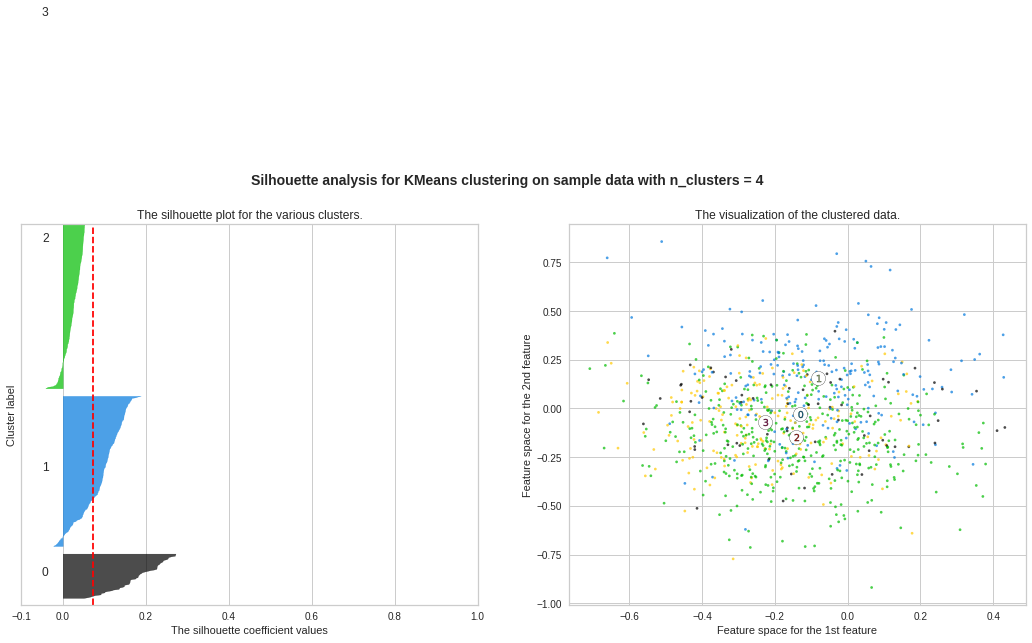

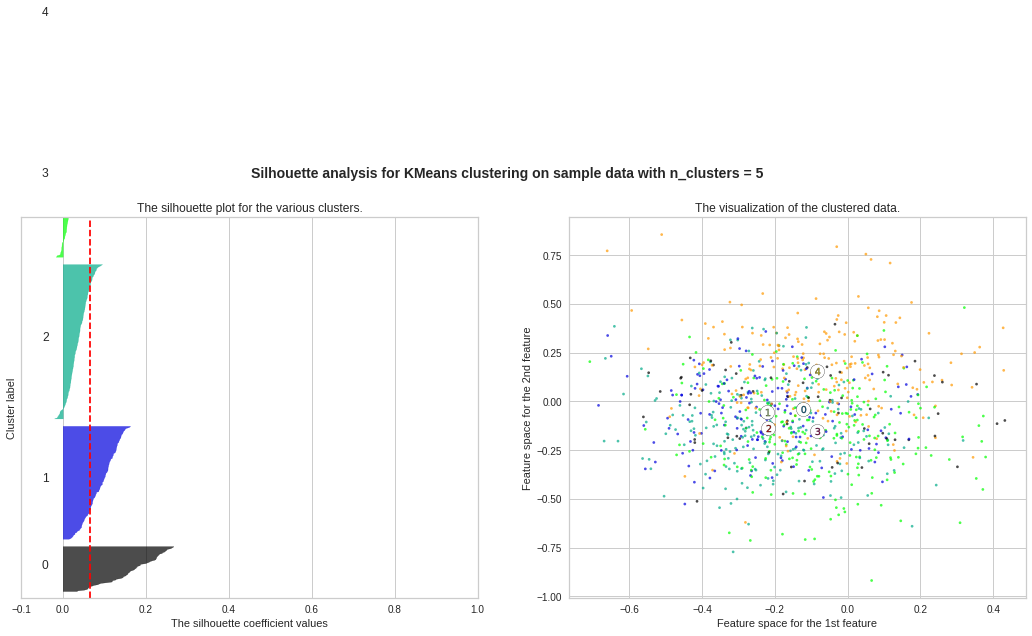

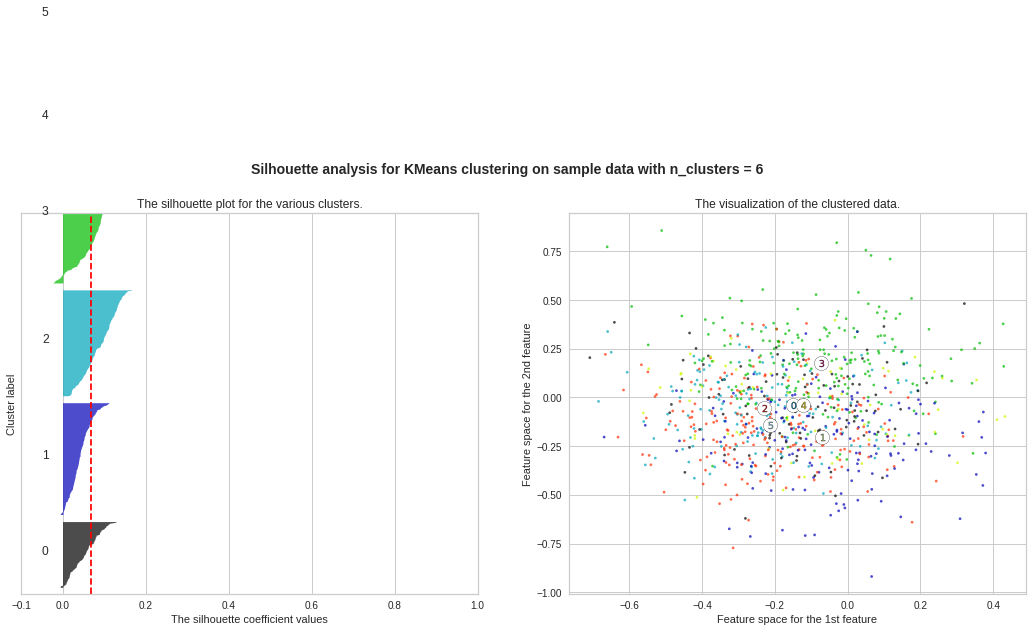

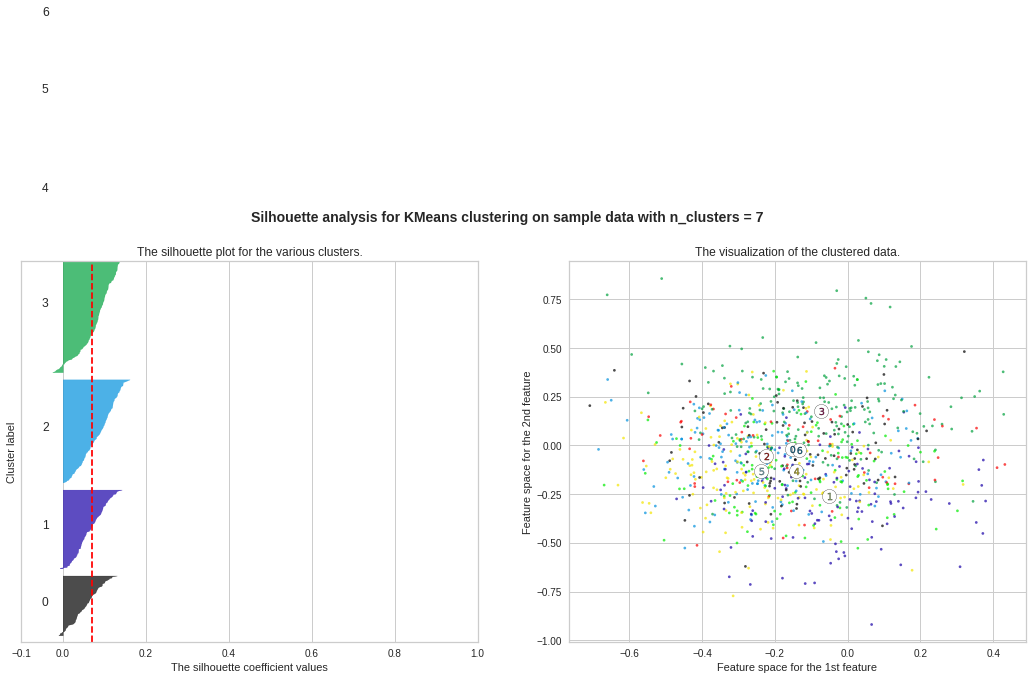

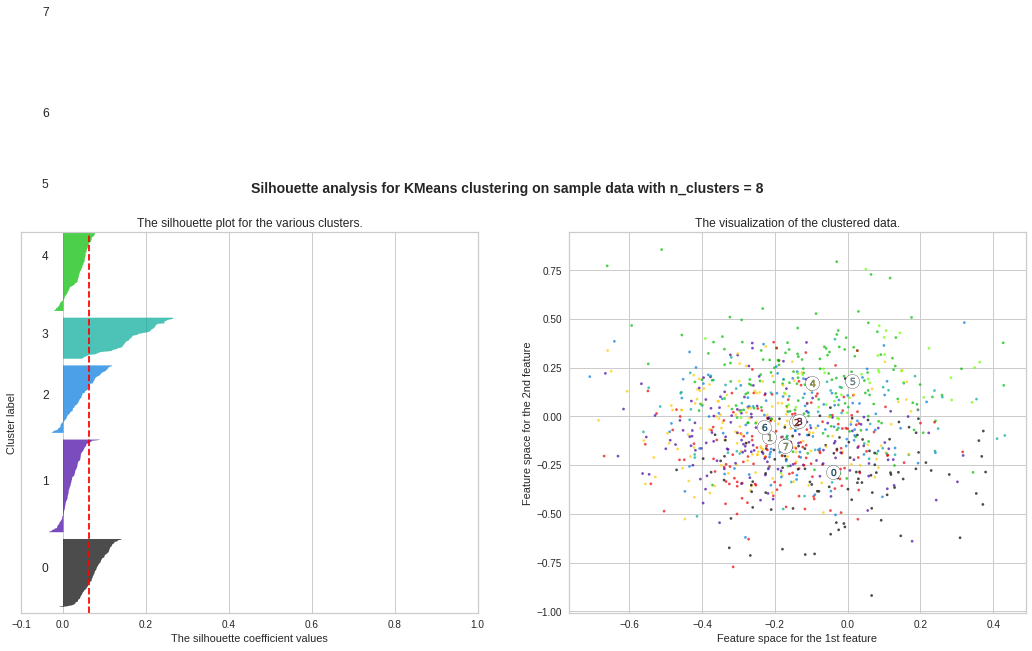

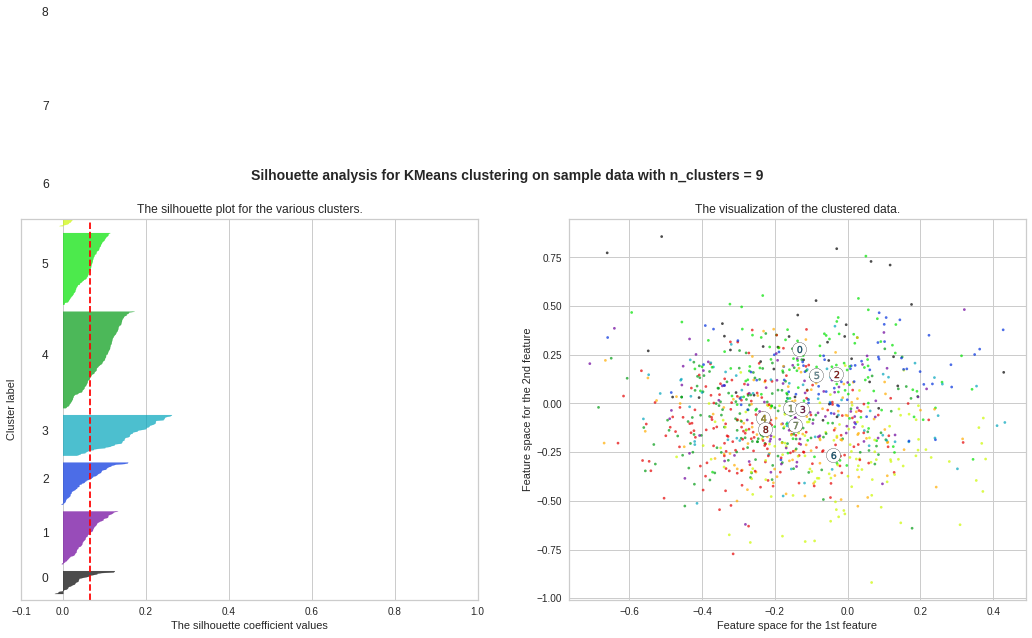

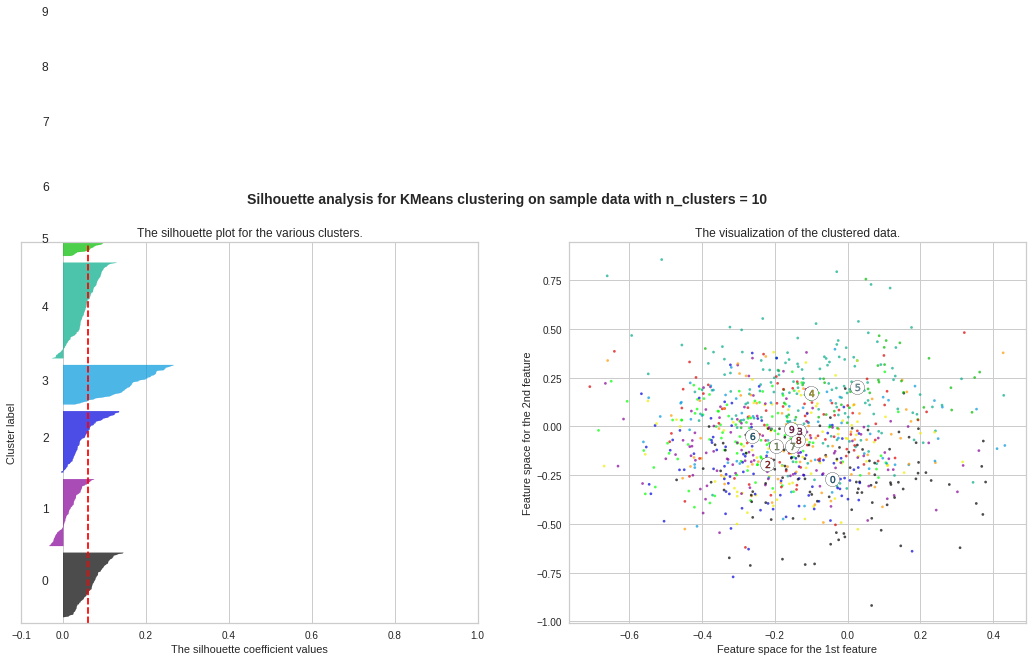

In [ ]:
# Generating the sample data from make_blobs
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(embeddingsab)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(embeddingsab, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(embeddingsab, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(embeddingsab[:, 0], embeddingsab[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

For n_clusters = 2 The average silhouette_score is : 0.42654485
For n_clusters = 3 The average silhouette_score is : 0.3364397
For n_clusters = 4 The average silhouette_score is : 0.33232093
For n_clusters = 5 The average silhouette_score is : 0.32937774
For n_clusters = 6 The average silhouette_score is : 0.3360351
For n_clusters = 7 The average silhouette_score is : 0.34025684
For n_clusters = 8 The average silhouette_score is : 0.2812209
For n_clusters = 9 The average silhouette_score is : 0.29609248
For n_clusters = 10 The average silhouette_score is : 0.29856828


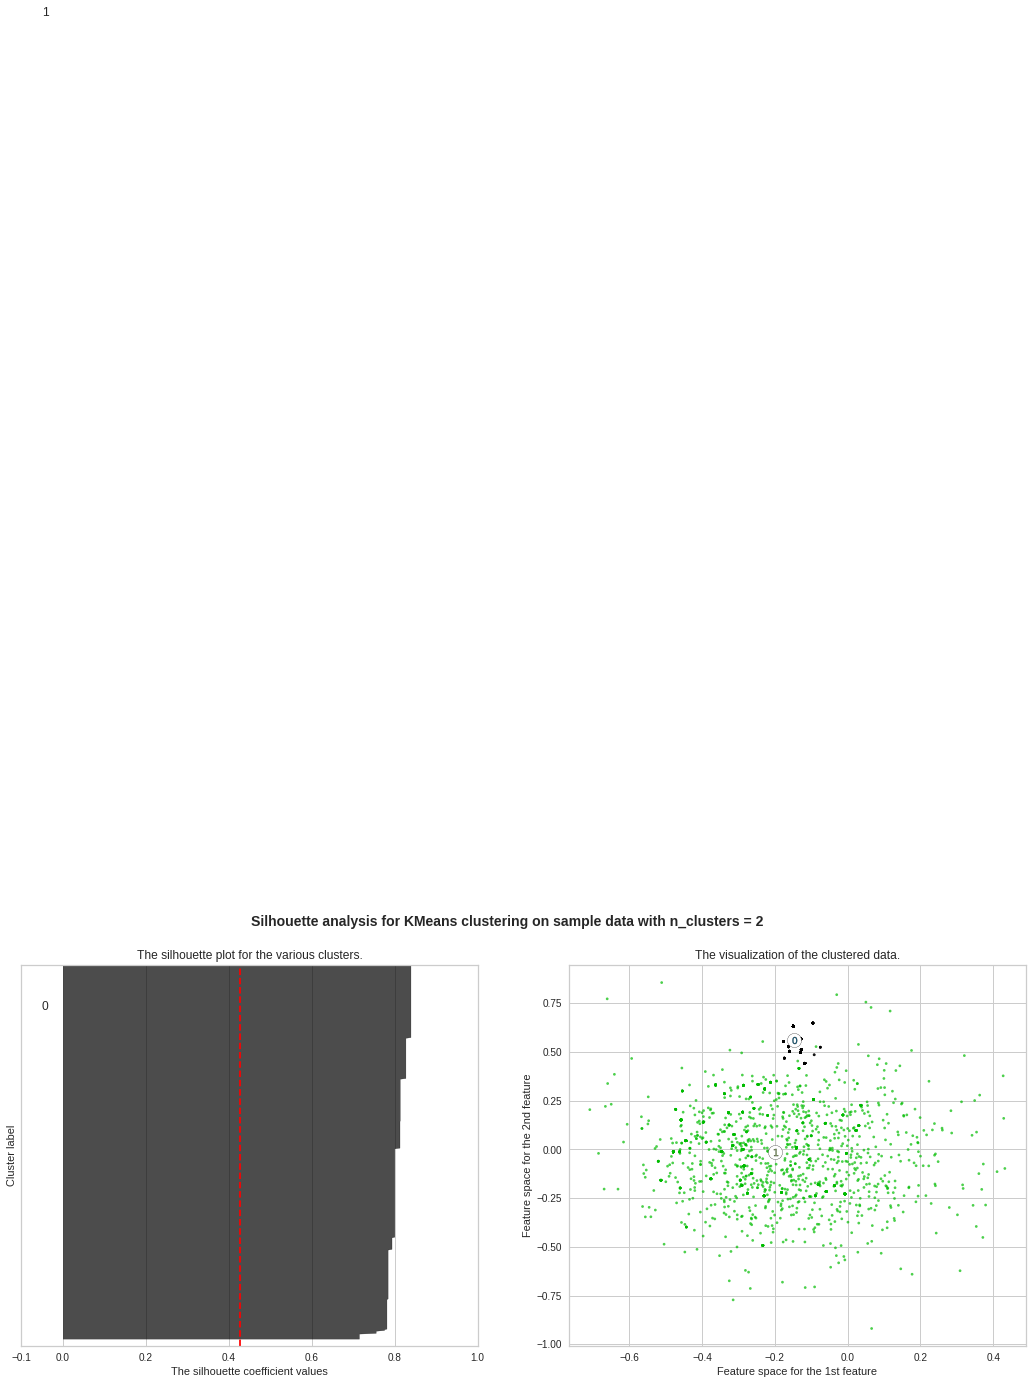

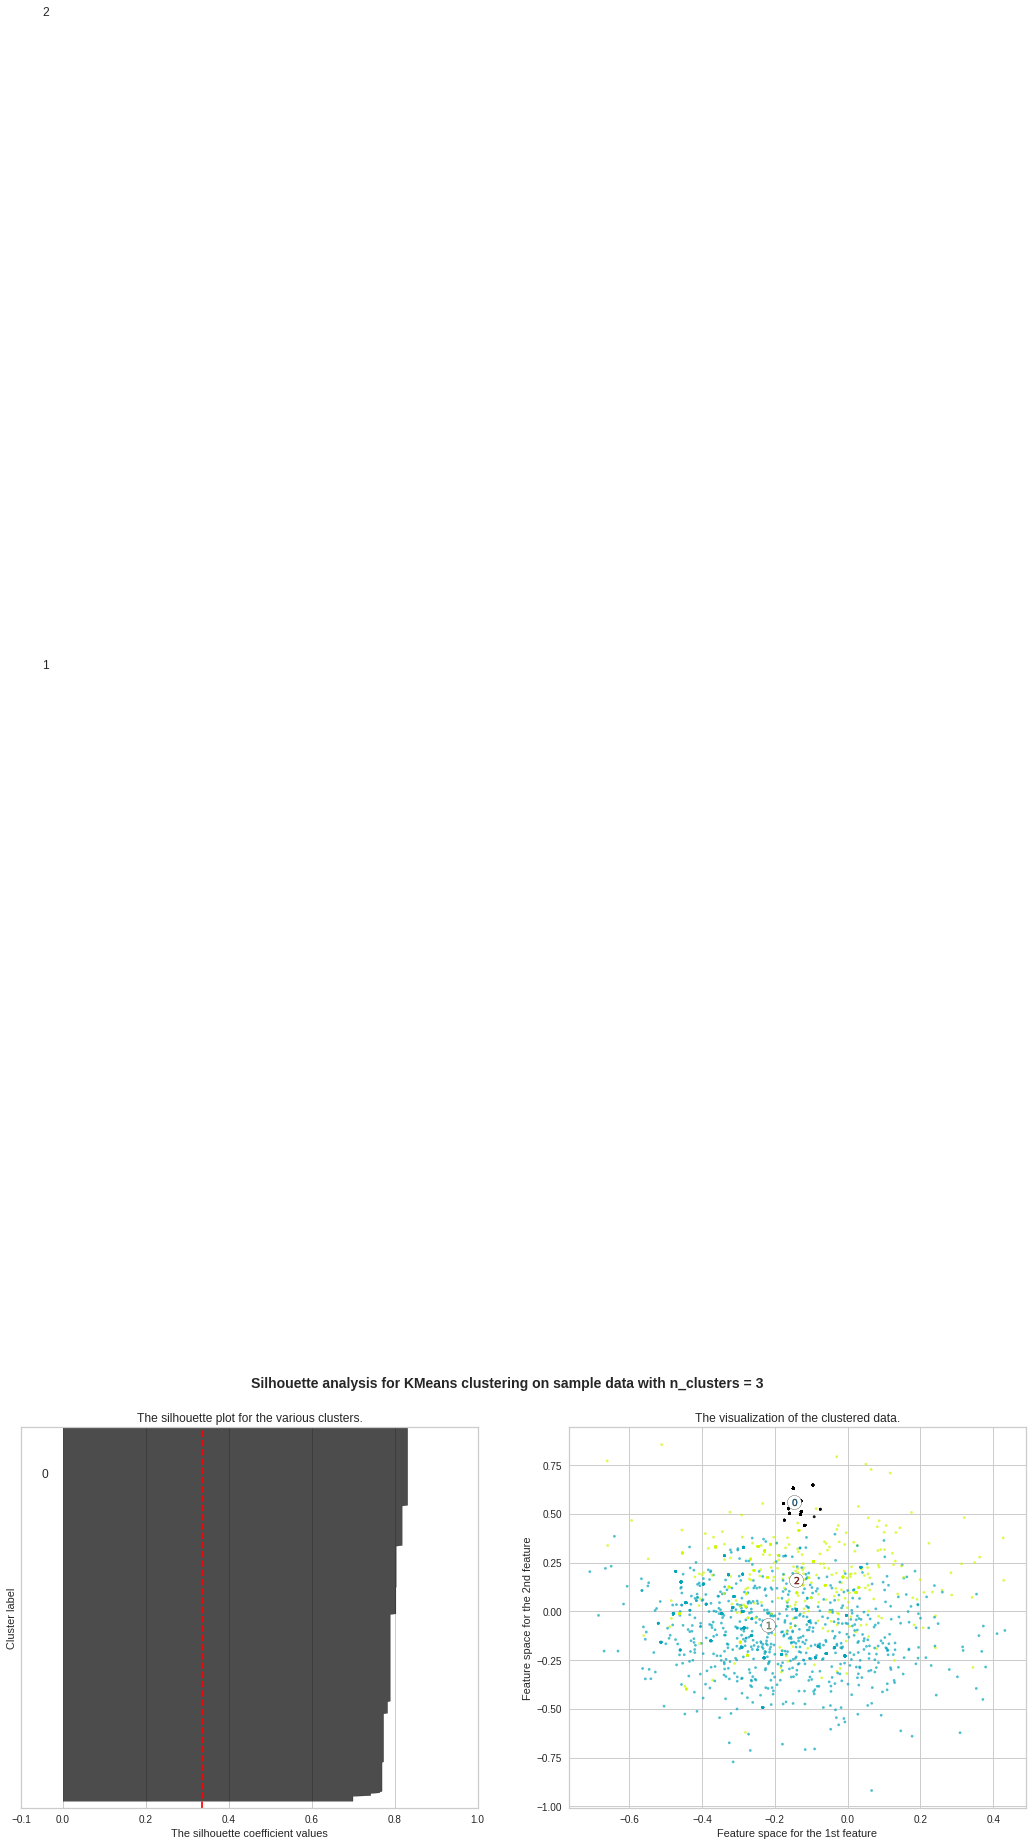

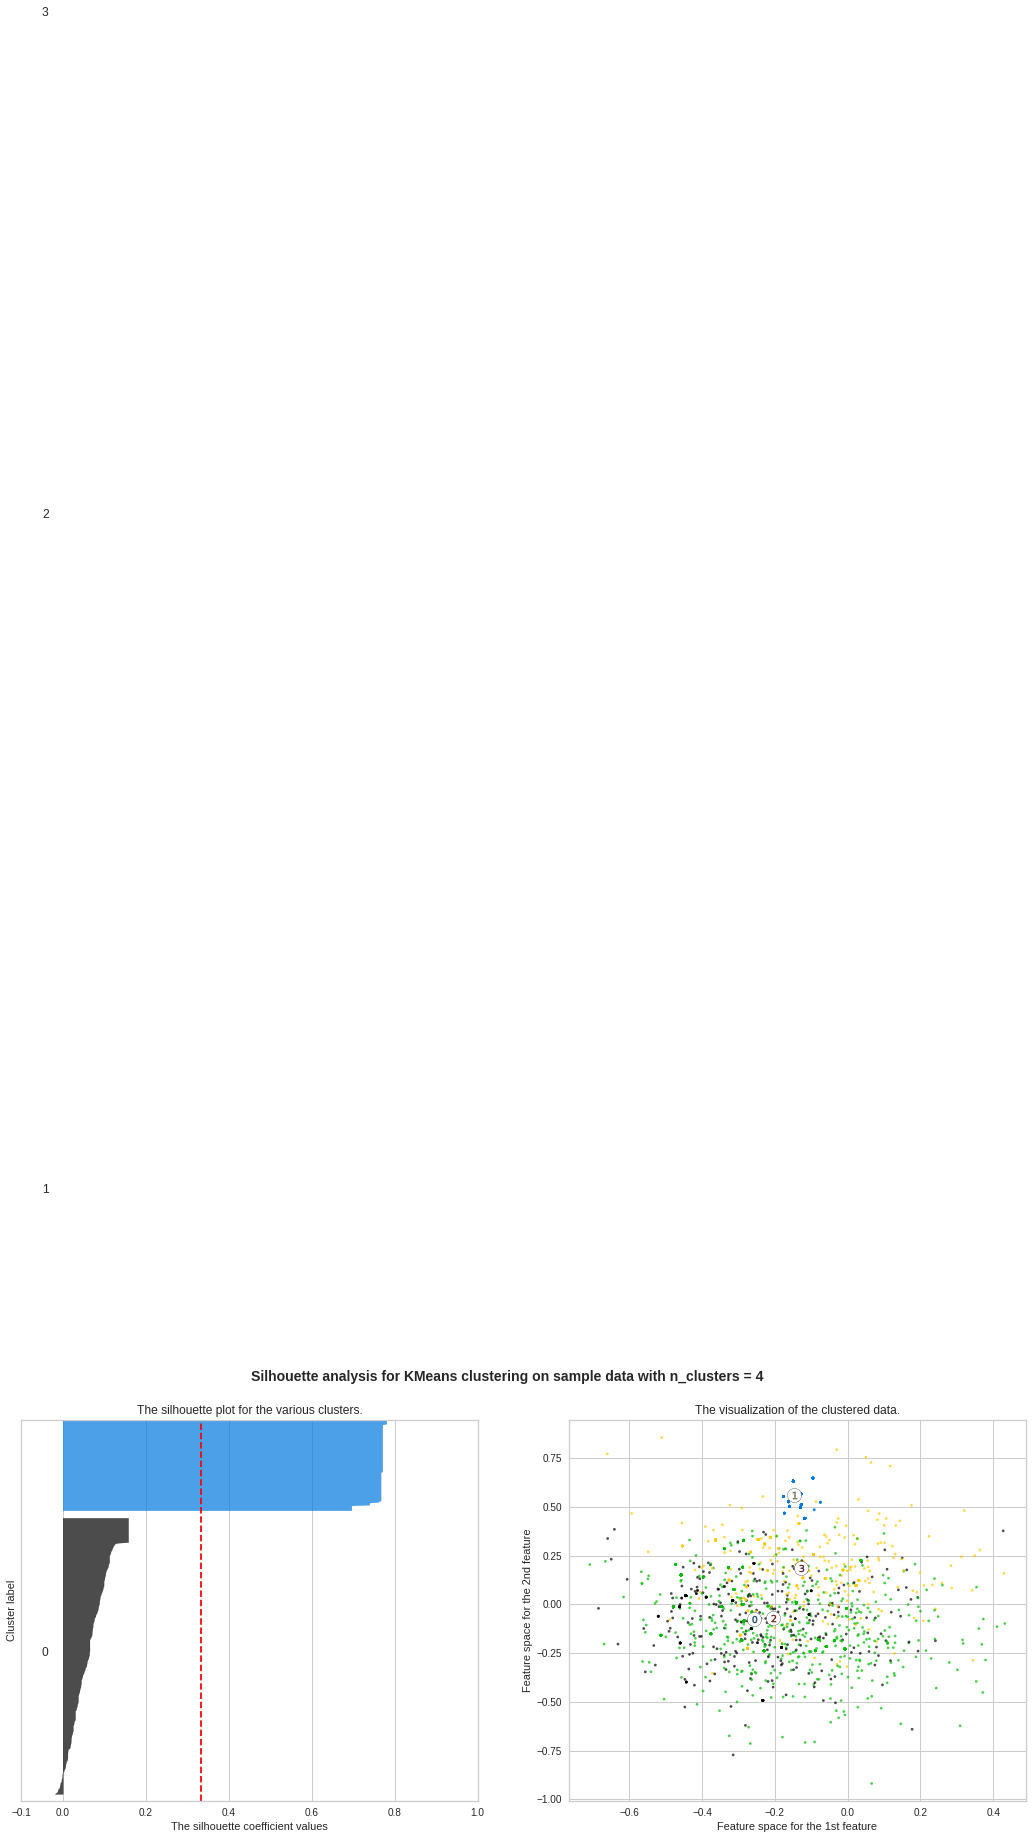

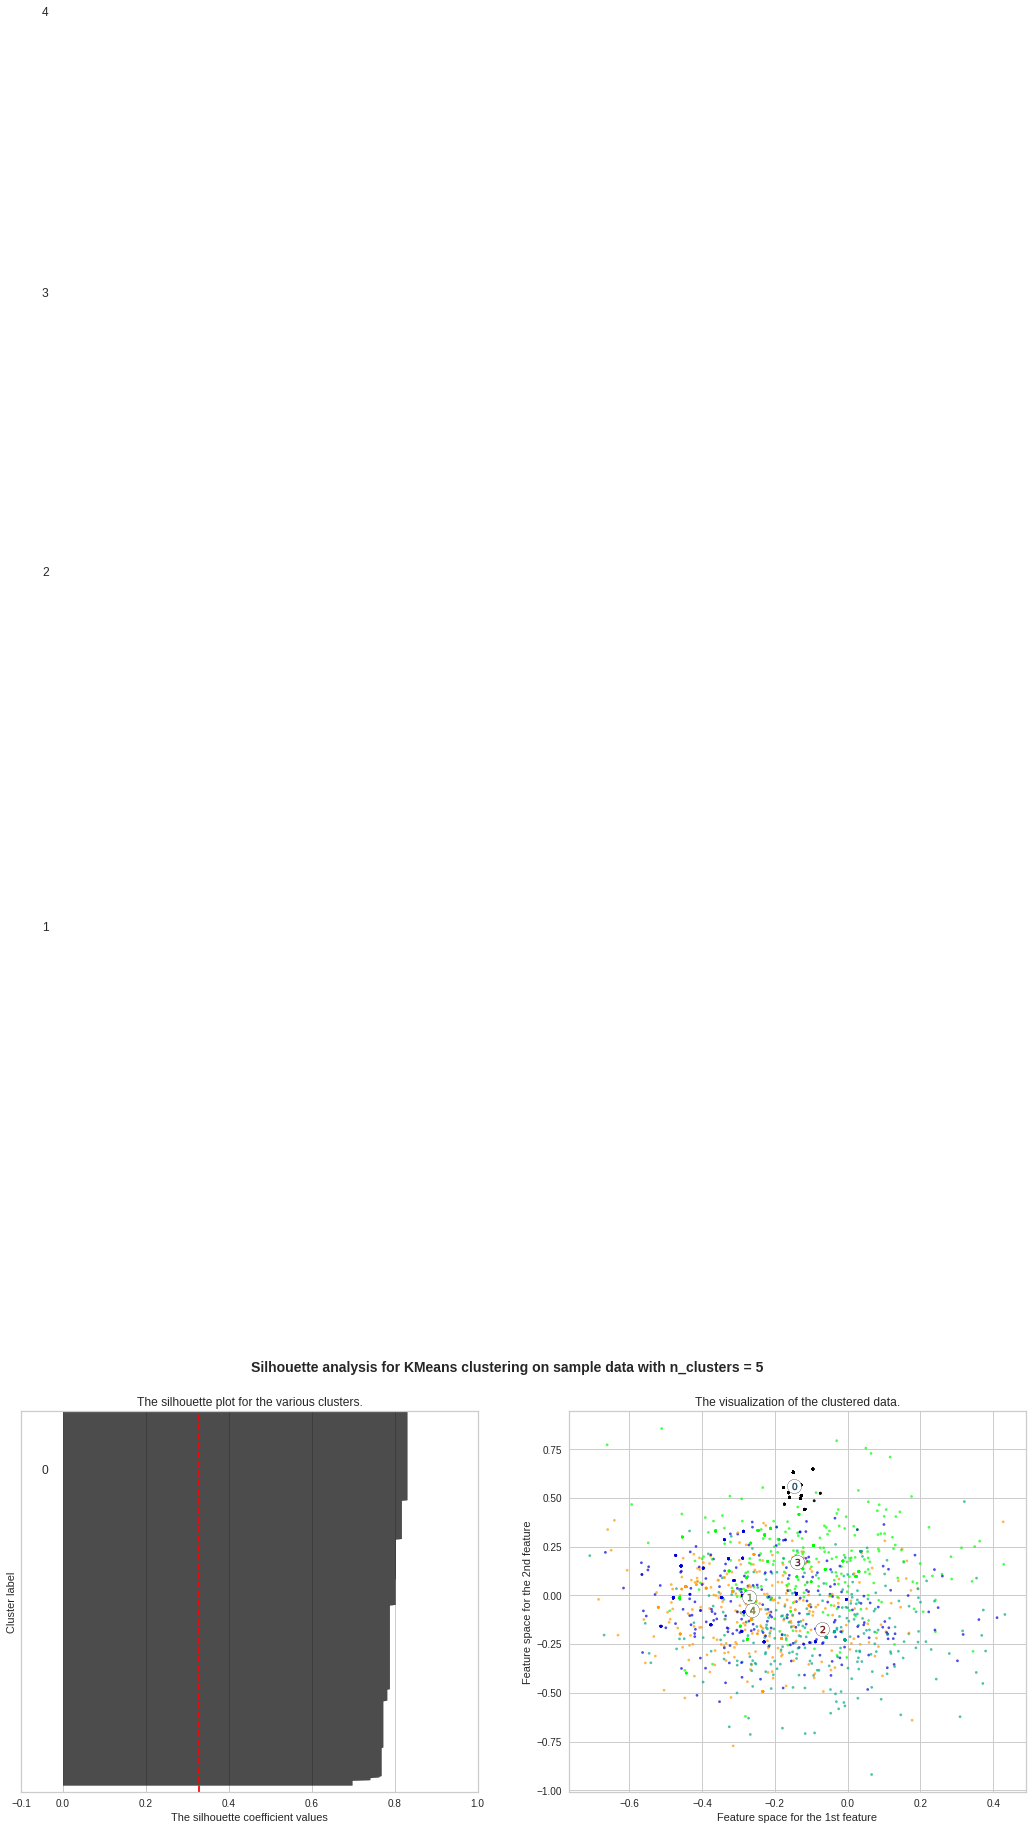

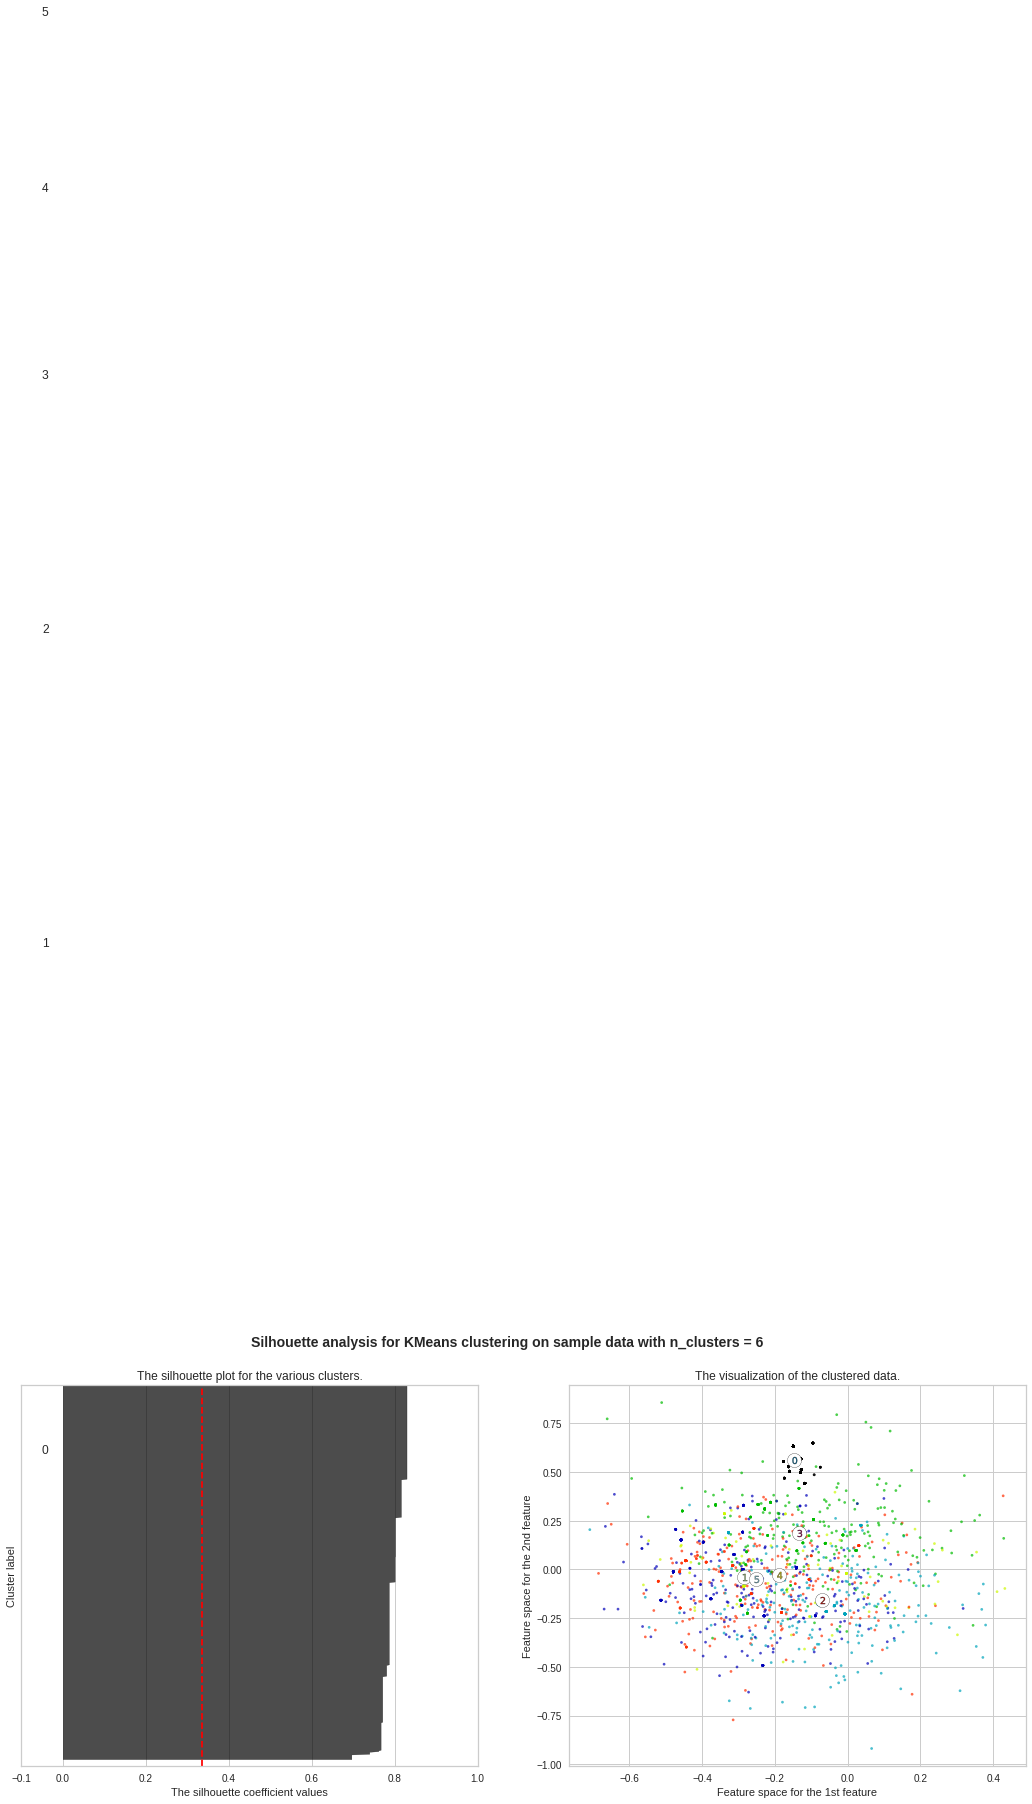

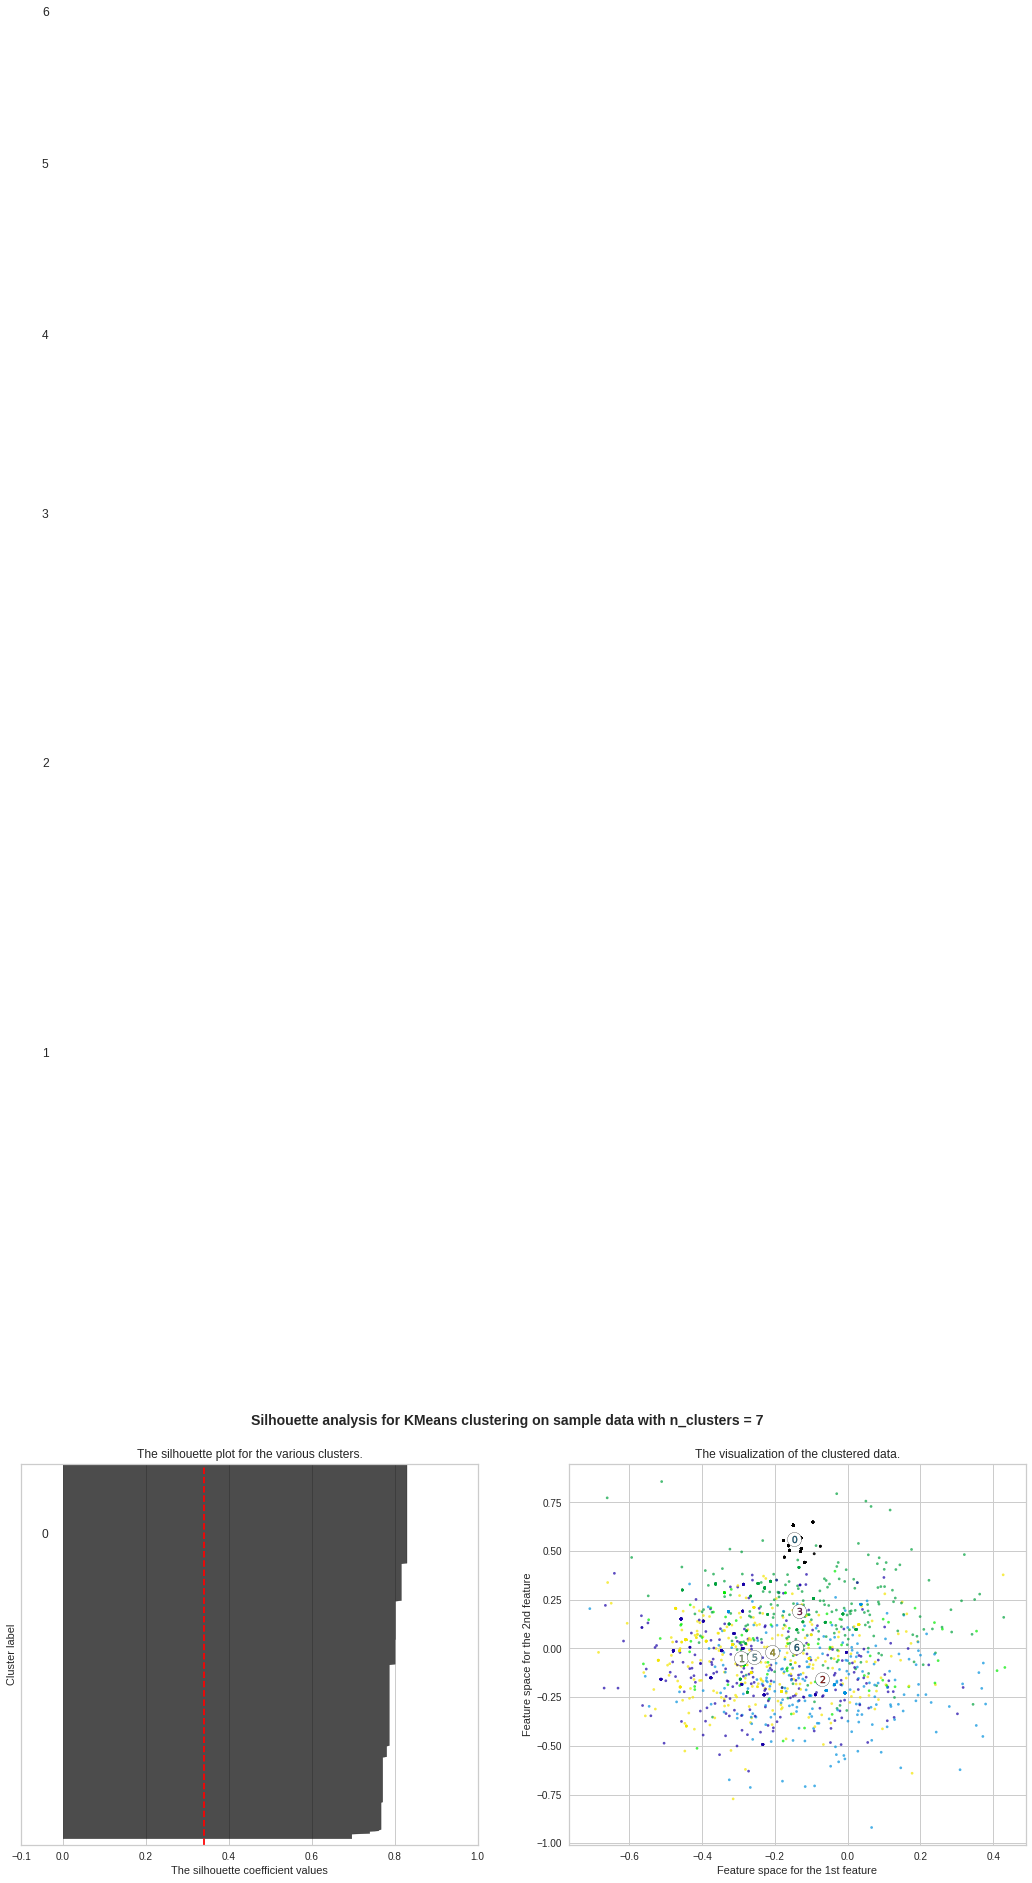

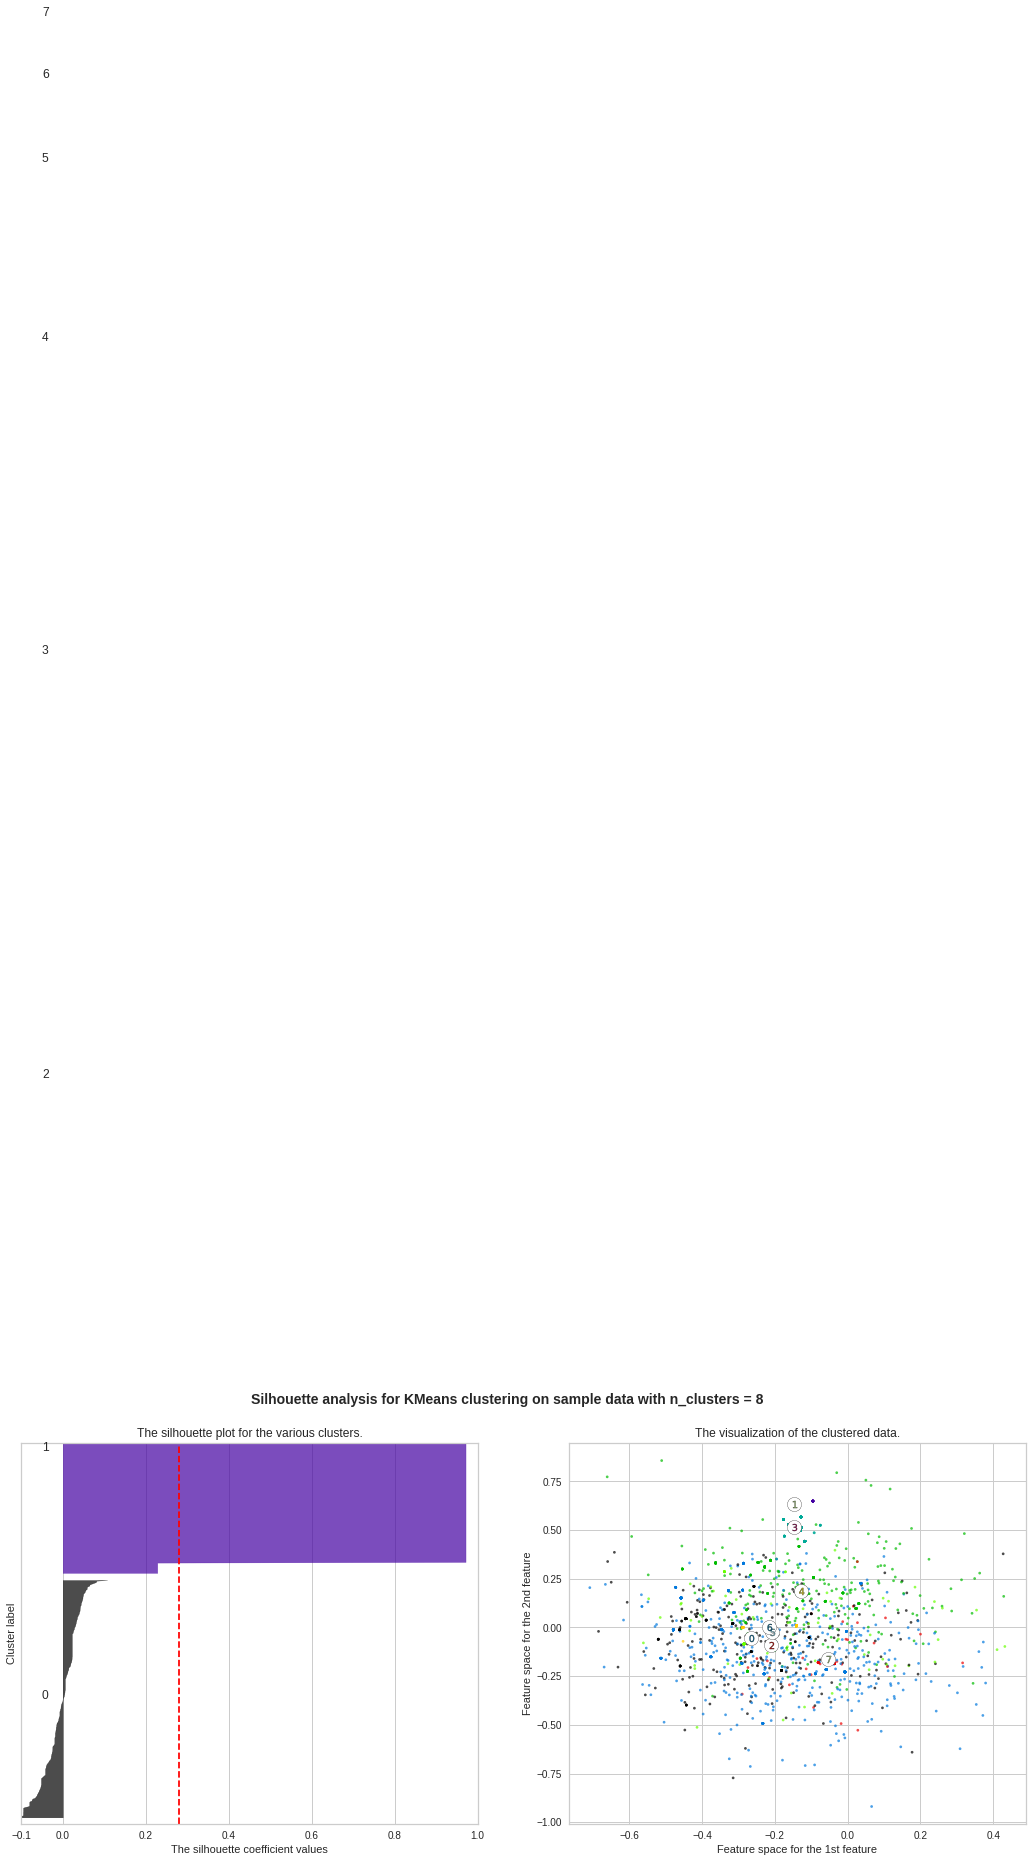

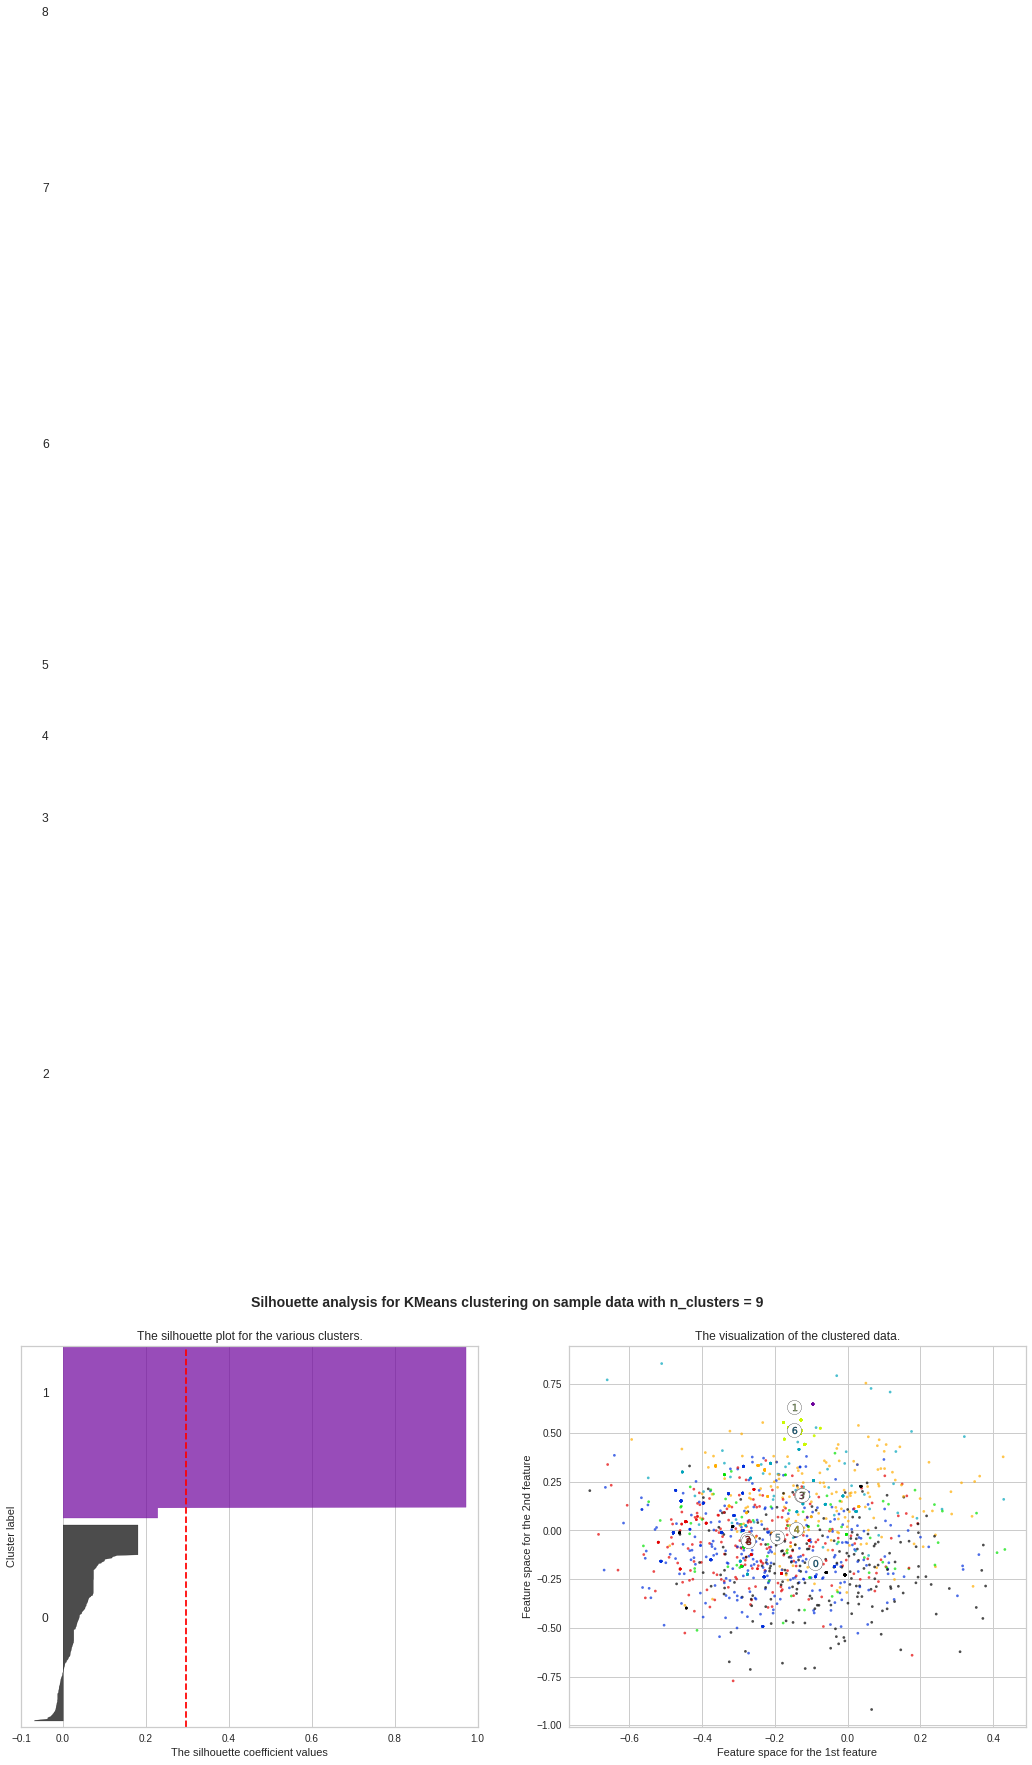

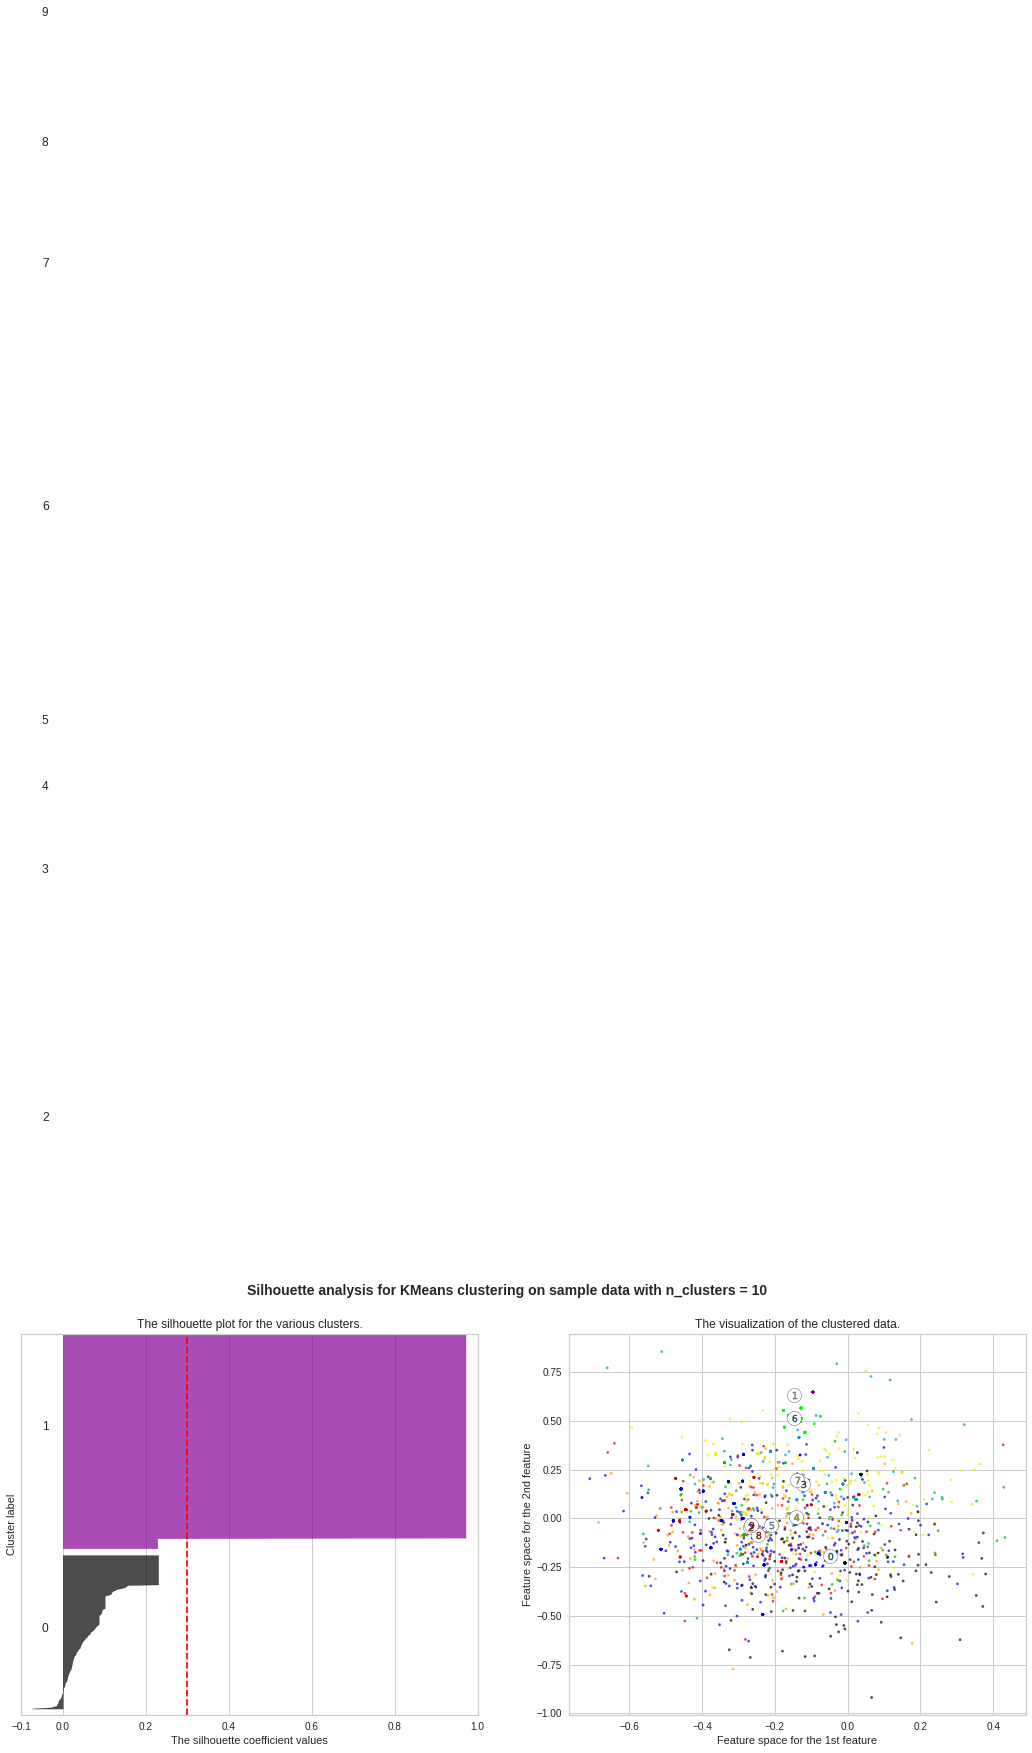

In [ ]:
# Generating the sample data from make_blobs
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(mergedemb_ab_eu_pj)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(mergedemb_ab_eu_pj, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(mergedemb_ab_eu_pj, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(mergedemb_ab_eu_pj[:, 0], mergedemb_ab_eu_pj[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()